# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [6]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [34]:
%%shell
jupyter nbconvert --to html /Dhupina_Patel_FoodHub_Project_Full_code__final.ipynb

[NbConvertApp] Converting notebook /Dhupina_Patel_FoodHub_Project_Full_code__final.ipynb to html
[NbConvertApp] Writing 1222320 bytes to /Dhupina_Patel_FoodHub_Project_Full_code__final.html


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# read the data
df = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations**:

1.   Order Distribution:

The dataset contains information about multiple orders, each identified by a unique order ID.
There are orders from different restaurants offering various cuisine types, including Korean, Japanese, Mexican, and American.

2. Customer Information:

Each order is associated with a unique customer ID, indicating that there are multiple customers in the dataset.

3. Cost of Orders:

The cost_of_the_order column provides the total cost of each order. The costs vary, indicating different pricing across the restaurants.

4. Day of the Week:

The day_of_the_week column indicates whether the order was placed on a weekday or weekend. This information can be useful for analyzing ordering patterns based on the day of the week.

5. Rating Information:

The rating column represents the rating given for each order. Ratings range from 3 to 5, suggesting a positive rating system.

6. Food Preparation and Delivery Times:

The food_preparation_time column represents the time it takes to prepare the food, and the delivery_time column indicates the time taken for the delivery. These time metrics can be analyzed to assess efficiency and customer satisfaction in terms of order fulfillment.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")


Number of rows: 1898, Number of columns: 9


**Observations**: The data frame has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [10]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


 **Observations**:We have 1 float data type, 4 integers and 4 objects.  Order ID, and Customer ID are also categorical variables with numerical labels. It has 1898 entries with 9 columns, including order details such as order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, and delivery_time.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [12]:
# Replace the not given value to 0
df['rating'] = df['rating'].replace(['Not given'],0)
df = df.astype({"rating": float, "order_id": object, "customer_id": object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


**Observations**:
No null values are observed in the data frame, hence it requires no treatment. ALthough, some orders have no reviews which are replaced with '0" instead of Not given.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [13]:
df.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000
mean,16.498851,2.659642,27.371970,24.161749
std,7.483812,2.195280,4.632481,4.972637
min,4.470000,0.000000,20.000000,15.000000
25%,12.080000,0.000000,23.000000,20.000000
50%,14.140000,4.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


**Observations**
We have 1898 observations, 25% of the observations cost 12.08 or below, take about 23 minutes or less to prepare, and 20 minutes or less to deliver.

It takes a minimum of 20 minutes, an average of 27 minutes, and a maximum of 35 minutes to prepare the food once the order is placed.

Order ID: Ranges from approximately 1,476,547 to 1,478,444.
Customer ID: Ranges from 1311 to 405,334.
Cost of the Order: Minimum is 4.47, maximum is 35.41, and there's a variation across the dataset.
Food Preparation Time: Minimum is 20 minutes, maximum is 35 minutes, and there's variability in preparation times.
Delivery Time: Minimum is 15 minutes, maximum is 33 minutes, and there's variability in delivery times.


### **Question 5:** How many orders are not rated? [1 mark]

In [14]:
df['rating'].value_counts(dropna=False)

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

 **Observations**:736 orders were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [15]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


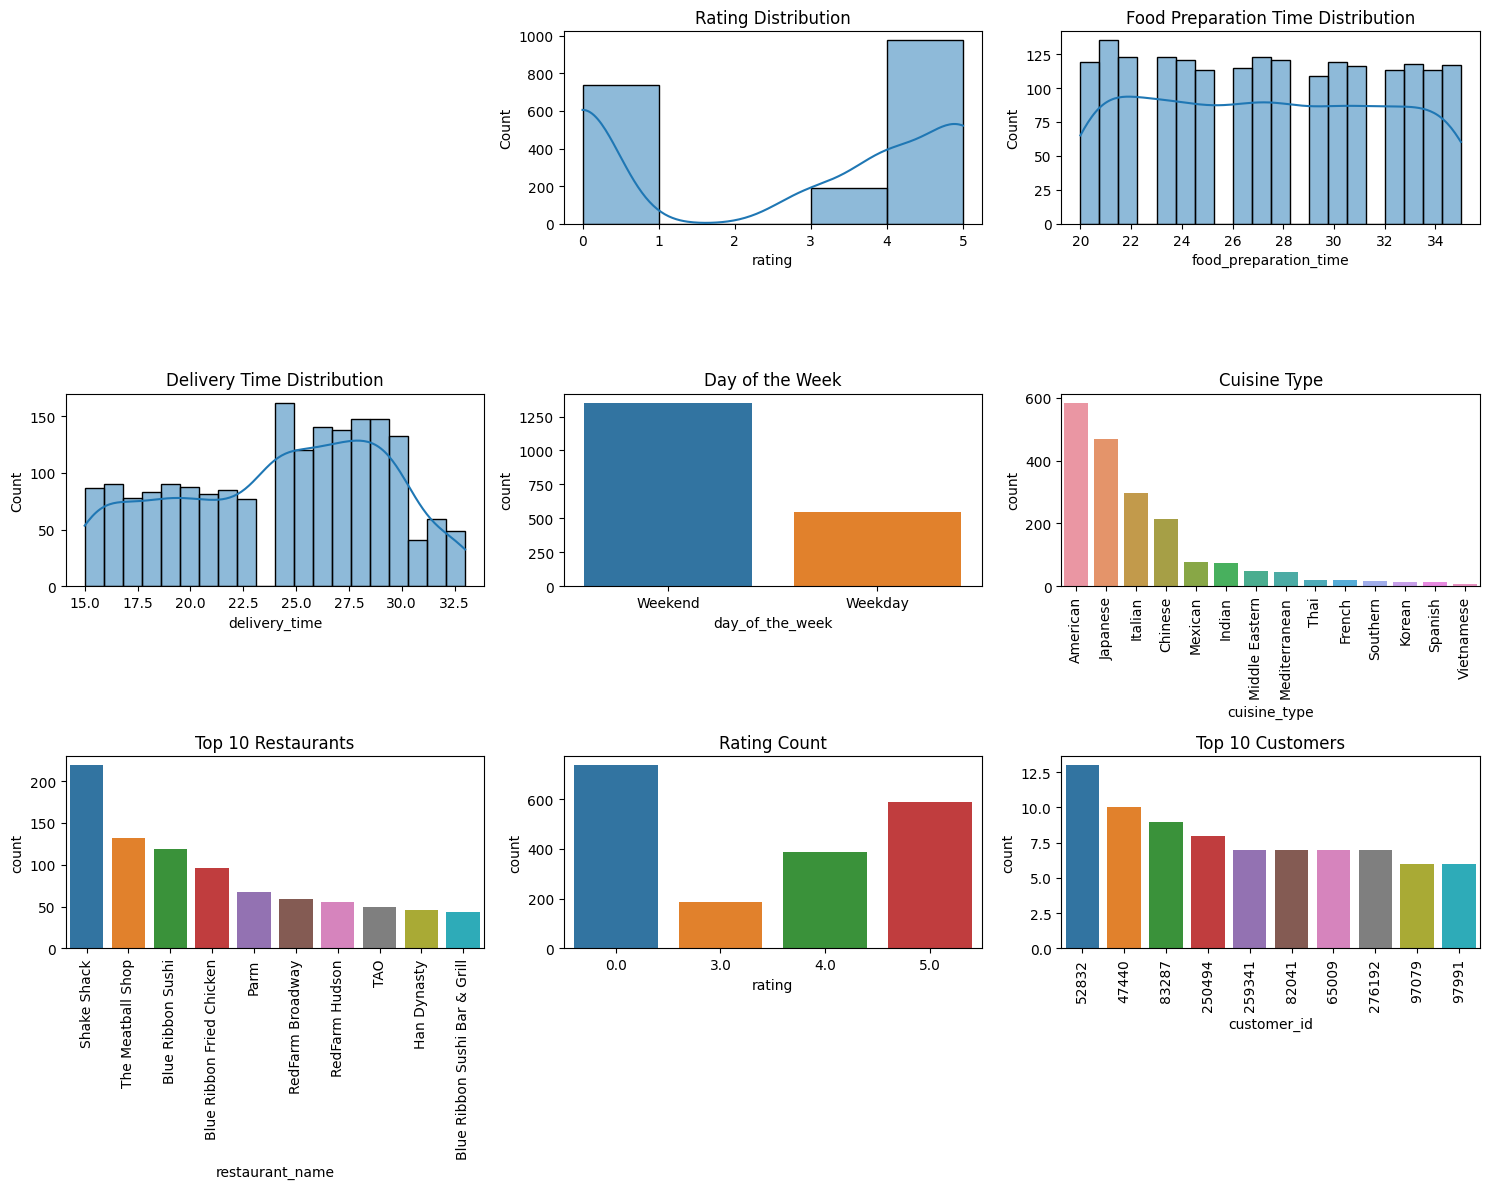

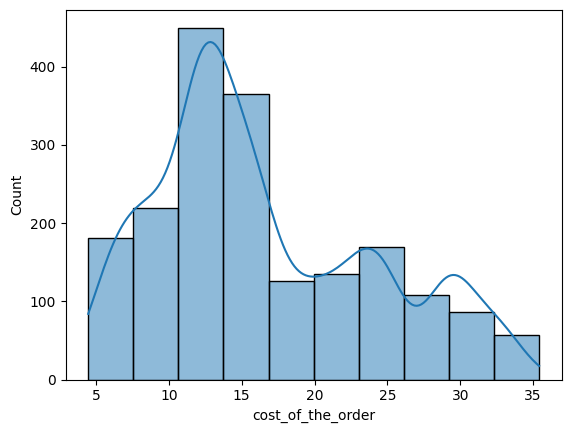

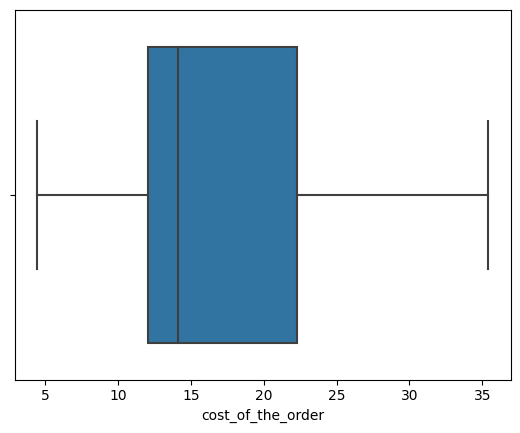

In [16]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate exploration with histograms and countplots
plt.figure(figsize=(15, 12))

# Histograms for numeric variables

plt.subplot(3, 3, 2)
sns.histplot(df['rating'], bins=5, kde=True)
plt.title('Rating Distribution')

plt.subplot(3, 3, 3)
sns.histplot(df['food_preparation_time'], bins=20, kde=True)
plt.title('Food Preparation Time Distribution')

plt.subplot(3, 3, 4)
sns.histplot(df['delivery_time'], bins=20, kde=True)
plt.title('Delivery Time Distribution')

# Countplot for categorical variables
plt.subplot(3, 3, 5)
sns.countplot(data=df, x='day_of_the_week')
plt.title('Day of the Week')

plt.subplot(3, 3, 6)
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cuisine Type')

plt.subplot(3, 3, 7)
sns.countplot(data=df, x='restaurant_name', order=df['restaurant_name'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Restaurants')

plt.subplot(3, 3, 8)
sns.countplot(data=df, x='rating')
plt.title('Rating Count')

plt.subplot(3, 3, 9)
sns.countplot(data=df, x='customer_id', order=df['customer_id'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Customers')

plt.tight_layout()
plt.show()
sns.histplot(data = df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();


**Observation on Cost of Orders**
The histplot indicates a left-skewed distribution, suggesting more lower-cost orders.There's a slight peak around $25, indicating a cluster of orders at that price point.

The boxplot reveals a right-skewed distribution with a median cost of about $14, indicating a larger spread above the median.

**Observations on Cuisine Type**
American, Japanese, Italian, and Chinese are the most popular cuisines, in that order.
Mexican and Indian cuisines show a close tie in popularity.

**Observations on Day of Week**
Weekend days show higher activity compared to other weekdays, suggesting increased orders or engagement during weekends.

**Observation on Food preparation time**
Even distribution of preparation times between 20 and 36 minutes is observed.
The median preparation time is around 27 minutes.

**Observations on Delivery Time**
The median delivery time is approximately 25 minutes.
The left-skewed distribution indicates that most orders are delivered within 25 to 28 minutes.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# Top 5 restaurants by order count
top_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants by order count:")
print(top_restaurants)

Top 5 restaurants by order count:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


**Observations:** Shake Shack is the leading restaurant with 219 orders, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken & Parm have 132, 119, 96 & 68 orders respectively.

1. Shake Shack (219 orders):

Clearly the most popular, with a significantly higher order count compared to others.

2. The Meatball Shop (132 orders):

Maintains a substantial number of orders, suggesting consistent popularity.

3. Blue Ribbon Sushi (119 orders):

A notable presence, indicating a preference for sushi among customers.

4. Blue Ribbon Fried Chicken (96 orders):

Despite specializing in fried chicken, it has a considerable order count, showcasing its popularity.

5. Parm (68 orders):

While lower in order count compared to the top contenders, Parm still holds a notable position in the top 5.

Overall, this ranking provides insights into customer preferences, highlighting Shake Shack as a standout favorite, followed by a mix of establishments catering to different culinary preferences.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [18]:
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)


,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


 **Observations:**
American Cuisine is the most popular during the weekends with a count of 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# Write the code here#
total_observations = df['cost_of_the_order'].count()
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
percentage_above20 = round((orders_above20/total_observations)*100,2) # Rounded to two decimal places
percentage_above20

29.24

**Observations:**29.24% of total orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
round(df.delivery_time.mean(),1)

24.2

#### Observations: It takes 24.2 minutes to have the prepared orders delivered on average.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# Write the code here
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


#### Observations:

The top 3 customer IDs are 52832 (order placed- 13), 47440 (orders placed- 10), 83287 (orders placed 9).

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


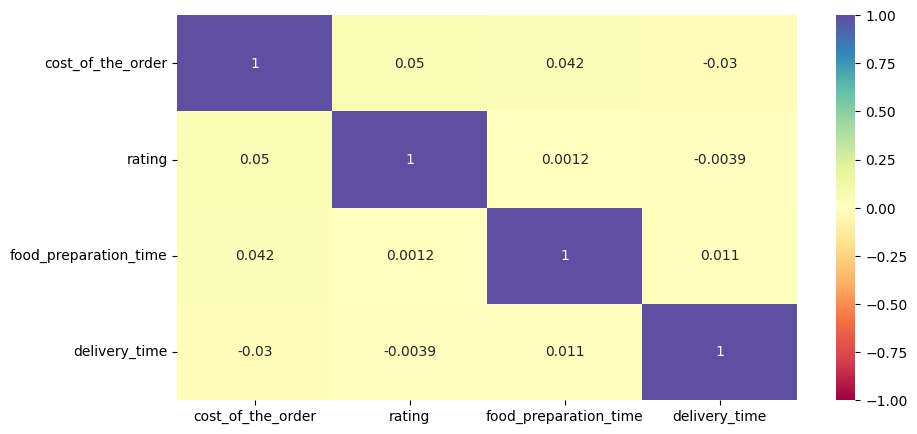

In [22]:
# Write the code here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5)) #Set the figure size
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observation**: The heatmap reveals a very weak correlation between the variables.

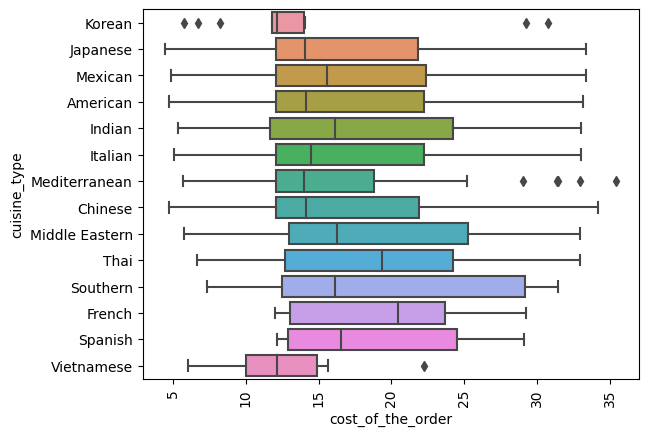

In [23]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();

**Observations on Spread Cost of Order**:

General Spread:

Most cuisines exhibit varying degrees of skewed cost distributions, indicating a diversity in order pricing.

Outliers:

Cuisines like Korean, Mediterranean, and Vietnamese stand out with outliers, suggesting some orders in these categories have significantly higher costs compared to the majority.
These observations highlight the diversity in cost structures among different cuisines, with certain cuisines showing a wider range due to the presence of outliers.

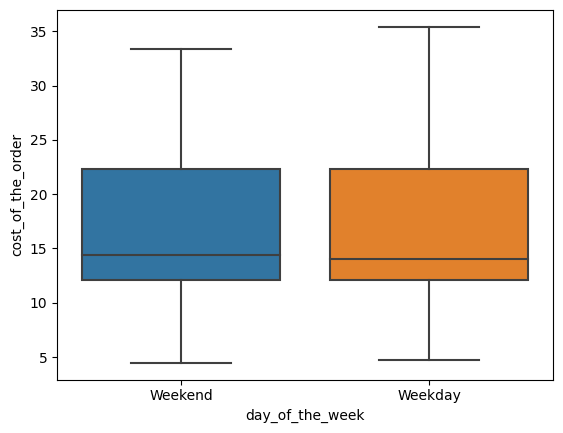

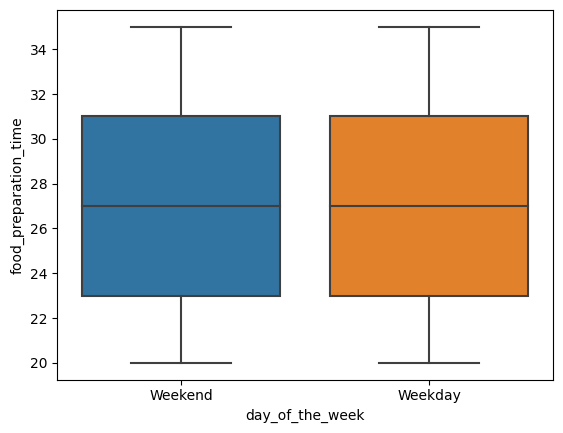

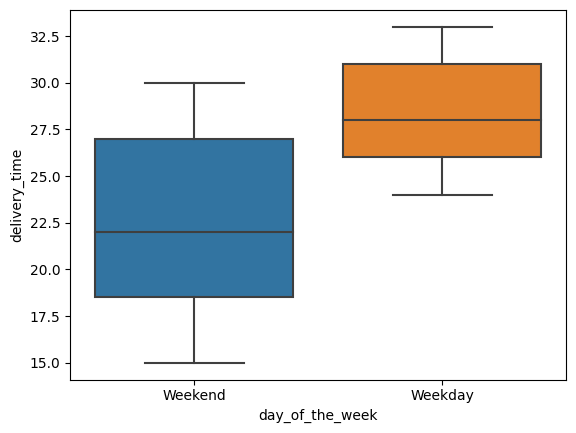

In [24]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

**Observations on Day of the week against the other variables:**

Overall Spread:

Across the days of the week, there is a generally steady spread of observations for most variables, indicating a consistent pattern.

Delivery Time Variation:

Delivery time shows variation based on the day of the week.
During weekends, the median delivery time is approximately 22.5 minutes.
On weekdays, the median delivery time increases to around 28.5 minutes.
This suggests that, on average, delivery times are shorter during weekends compared to weekdays.
These observations highlight a specific pattern related to delivery time, with potential implications for operational efficiency or customer expectations on different days of the week.

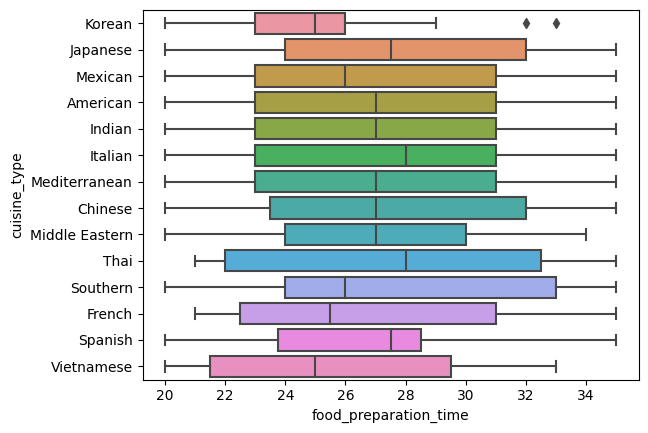

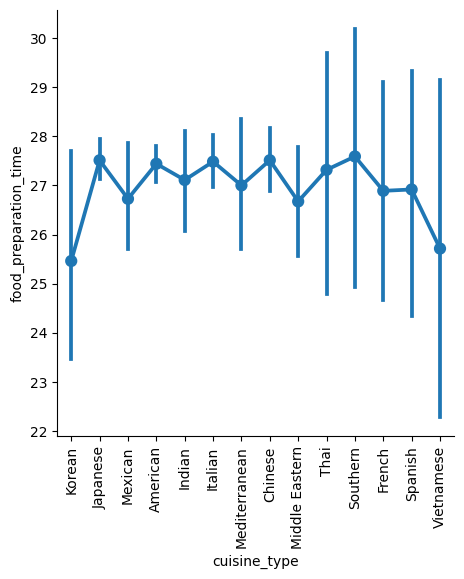

In [25]:
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

**Observation:**
Average Preparation Time:

Most cuisine types exhibit a similar average preparation time, suggesting a general consistency in the time it takes to prepare dishes across various cuisines.

Spread of 95% Confidence Interval:

However, there is variability in the spread of the 95% confidence interval among different cuisine types.
Some cuisines may have a larger spread, indicating a greater range of preparation times within that cuisine.
This observation implies that while the average preparation time is consistent, certain cuisines may have more variability in the time it takes to prepare individual orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [26]:
#returns the top-five restaurants by total number of orders with ratings
df.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index().head()

,restaurant_name,rating
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


In [27]:
# Group by restaurant and calculate average rating and rating count
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['mean', 'count']).reset_index()

# Filter for average rating more than 4 and rating count more than 50
filtered_restaurants = restaurant_ratings[(restaurant_ratings['mean'] > 4) & (restaurant_ratings['count'] > 50)]

print(filtered_restaurants)

Empty DataFrame
Columns: [restaurant_name, mean, count]
Index: []


In [28]:
# Group by restaurant and calculate average rating and rating count
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['mean', 'count']).reset_index()

# Filter for average rating more than 4 and rating count more than 50
filtered_restaurants = restaurant_ratings[(restaurant_ratings['mean'] > 4) & (restaurant_ratings['count'] > 50)]

# Display the result or handle empty DataFrame
if not filtered_restaurants.empty:
    print(filtered_restaurants)
else:
    print("No restaurants meet the specified criteria.")

No restaurants meet the specified criteria.


#### **Observations**:No restaurants meet the specified criteria of rating count of more than 50 and the average rating should be greater than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [29]:
# Write the code here
revenue = 0
income = 0
cost = pd.Series(df['cost_of_the_order'])
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income

In [30]:
print('Net revenue generated is: ',round(revenue,2),'assuming no commission charged for orders with cost below $5')

Net revenue generated is:  6166.3 assuming no commission charged for orders with cost below $5


**Observations**:The revenue calculation of $6166 assumes that orders with a cost below $5 incur no commission charges suggesting a specific pricing or commission strategy based on order cost brackets, potentially designed to incentivize lower-cost orders.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [31]:
long_delivery_orders = (df['food_preparation_time'] + df['delivery_time'] > 60).mean() * 100
print(f"Percentage of orders taking more than 60 minutes for delivery: {long_delivery_orders:.2f}%")


Percentage of orders taking more than 60 minutes for delivery: 10.54%


**Observations**:Approximately 10.54% of orders in the dataset take more than 60 minutes to both prepare and deliver. This observation highlights a portion of orders experiencing a longer processing and delivery time, indicating a potential area for improvement or investigation into factors contributing to extended wait times for these specific orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [32]:
# Write the code here

avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
avr_del_time

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

**Observations**:

Weekday:

Mean Delivery Time: Approximately 28.34 minutes.
Total Delivery Time: 15,502 minutes.
Number of Orders (Count): 547 orders.
Standard Deviation: 2.89 minutes.
Indicates longer average delivery times during weekdays.
Weekend:

Mean Delivery Time: Approximately 22.47 minutes.
Total Delivery Time: 30,357 minutes.
Number of Orders (Count): 1,351 orders.
Standard Deviation: 4.63 minutes.
Suggests shorter average delivery times during weekends.

These observations reveal a difference in mean delivery times between weekdays and weekends. Further analysis could explore factors contributing to this variation and assess its impact on customer satisfaction or operational efficiency.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Rating Patterns:
The concentration of ratings around the high score of 5 suggests that mainly very satisfied customers bother to rate the service.
However, the absence of ratings for about 38% of orders raises the question of potential skewing if these unrated orders were considered.

Cost of Orders:
The bimodal distribution of cost with peaks around $13 and $25 indicates a varied pricing structure, possibly catering to different customer preferences or menu options.

Cuisine Popularity:
Cuisine popularity remains consistent regardless of the day of the week, but demand significantly increases over the weekends.

Preparation and Delivery Times:
Preparation time is relatively consistent across cuisines, while delivery time exhibits a wider range, contributing significantly to the total preparation time.

Customer Reward Criteria:
There is a tie among 4 customers for the 5th position based on the proposed reward criteria. Further analysis or decision-making is required on how to handle such ties.

Dataset Insights:
The dataset contains valuable information about customer orders, restaurant performance, and delivery times.
Wide ranges in delivery times, especially orders taking more than 60 minutes, could impact customer satisfaction.
Certain restaurants stand out as highly popular, receiving a substantial number of orders.
These conclusions provide a comprehensive overview of various aspects within the dataset, highlighting areas for further analysis and potential business considerations.


Recommendations

Enhance Customer Feedback:

Implement a systematic feedback collection process post-order.
Employ surveys or interactive methods to understand the reasons behind customers not providing ratings.
Introduce a rewarding system for customers consistently offering valuable feedback.

Precision in Marketing:

Conduct a thorough demographic analysis to validate assumptions about market segments.
Tailor marketing strategies based on customer data to effectively reach specific segments.

Boost Operational Efficiency:

Undertake a comprehensive review of food preparation and delivery processes to identify and mitigate bottlenecks.
Explore technology solutions and process enhancements to reduce overall delivery times.

Weekday Ordering Optimization:

Investigate factors contributing to extended delivery times on weekdays, addressing issues like traffic or order processing.
Foster transparent communication with customers, providing clear expectations for delivery times on weekdays.

Refined Tie-Breaker Criteria:

Establish transparent criteria for resolving ties in promotional offers.
Consider implementing a tiered reward system based on factors such as total spending or loyalty points.

Dynamic Performance Evaluation:

Conduct regular performance reviews encompassing restaurant performance, customer satisfaction, and promotional offer effectiveness.
Adapt strategies promptly based on evolving trends and customer preferences.

Engaging Customer Loyalty:

Launch a well-designed customer loyalty program with tangible incentives for frequent orders.
Promote the loyalty program through diverse channels to encourage widespread participation.
These refined recommendations aim to elevate customer satisfaction, streamline operational processes, and foster customer loyalty. Regular assessments and agility in adapting strategies will be pivotal in navigating the dynamic landscape of the market.


---